# Tutorial 3: Supervised Machine Learning

In this tutorial you are going to learn how to:

<div class="alert alert-block alert-warning">
    
**[Load and prepare similarity matrices](#Loading-similarity-matrices)**

**[Build a supervised machine learning model](#Model-building)**

**[Analyze and optimize the model](#Model-optimization)**
    
</div>

Let's get started!

## Loading similarity matrices

In the last tutorial, we calculated similarity matrices from three kinds of material fingerprints and qualitatively compared them using a clustering approach. Now, we a going to use those matrices to build simple machine learning models. 

First we need to import some classes.

In [1]:
from madas import SimilarityMatrix

In [2]:
from madas.machine_learning import SimilarityMatrixRegression

Loading similarity matrices can be done by specifying the name and path of the matrix file.

In [3]:
soap_simat = SimilarityMatrix.load("CuPdAu_SOAP_simat.npy", "data")
pte_simat = SimilarityMatrix.load("CuPdAu_PTE_simat.npy", "data")
sg_simat = SimilarityMatrix.load("CuPdAu_SG_simat.npy", "data")

For a supervised ML task, we need a property to predict. For this tutorial, we will predict the energy per atom for each material.

To get these properties, we load the `MaterialsDatabase` and extract the properties.

In [4]:
from madas import MaterialsDatabase

db = MaterialsDatabase(filename="CuPdAu-energies.db")
assert len(db) == 196, "Please run tutorial 1 first!"

In [5]:
targets = db.get_properties("energy_per_atom")

For performing a train/test split, we need the material ids, which we can get from the similarity matrices, or, alternatively, from the database. 

In [6]:
mids = soap_simat.mids

Next, we split the mids and target properties into a training and a validation set. This can be done, e.g., using `sklearn`.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_mids, test_mids, train_targets, test_targets = train_test_split(mids, targets)

Similarly, we need to split the similarity matrices. Thus, the model we create does not contain any information about the validation set.

In [9]:
train_soap_matrix, test_soap_matrix = soap_simat.train_test_split(train_mids, test_mids)

## Model building

First, we import the `KernelRidge` class from `sklearn`. It implements Kernel Ridge regression (KRR), which we can use with the similarity matrices to build a model. Similarity matrices can be used as a precomputed kernel for KRR, saving the cost of re-computing the kernel matrix.

In [10]:
from sklearn.kernel_ridge import KernelRidge

In [11]:
reg = SimilarityMatrixRegression(kernel_matrix=train_soap_matrix, # The kernel matrix is the data we train on 
                                 prediction_matrix=test_soap_matrix, # The prediction matrix is used for validation 
                                 regressor=KernelRidge, # Here we specify the regressor, i.e. the model
                                 kernel = "precomputed", # These kwargs are passed to the regressor upon initialization
                                 alpha = 1e-3).fit(train_targets)

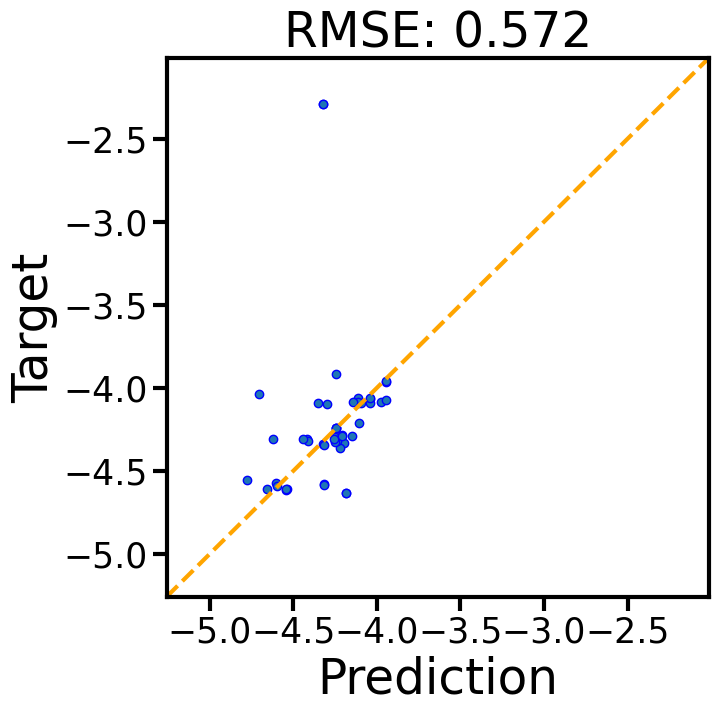

In [12]:
# For plotting the results, we can use a predefined routine 
from madas.plotting import prediction_target_plot

prediction_target_plot(reg.predict() , test_targets)

## Model optimization

So far, we have chosen only one predefined parameter $\alpha$ for the $l2$ optimization which is used by KRR. To choose the value, we can optimize it using cross validation (CV).

In [13]:
import numpy as np

reg.fitCV(train_targets,
          n_folds=20,
          regressor_parameters={'alpha': np.logspace(-1,-10, num = 10)},
          square_kernel=True)

fold:   0%|          | 0/20 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

We can look at the selected parameters using the `sklearn` API of the `regressor` attribute:

In [14]:
reg.regressor.get_params()

{'alpha': 1e-05,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'precomputed',
 'kernel_params': None}

Let's plot the results and see if it got better:

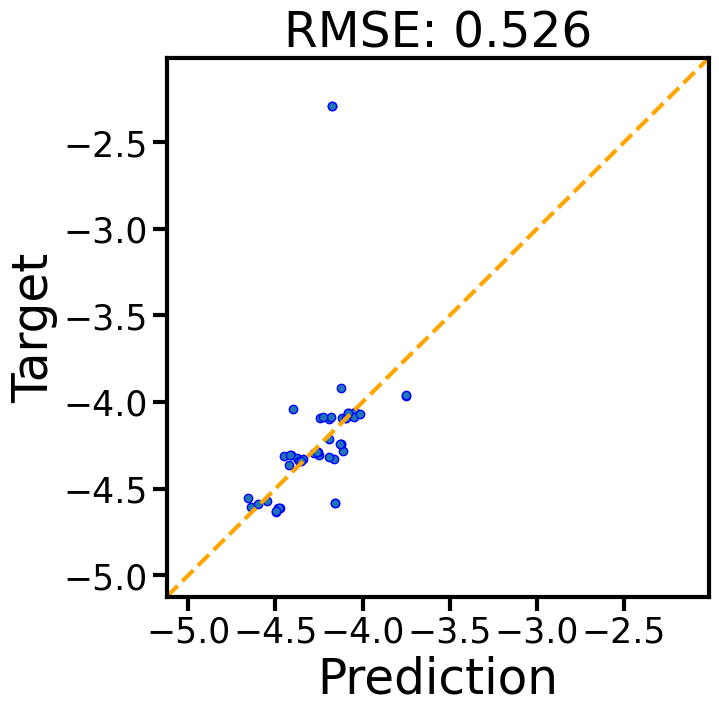

In [15]:
prediction_target_plot(reg.predict(), test_targets)

As you can see, the quality of the predictions has improved significantly.

We can repeat the same procedure for the PTE and SG matrices to see how well they perform.

fold:   0%|          | 0/20 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

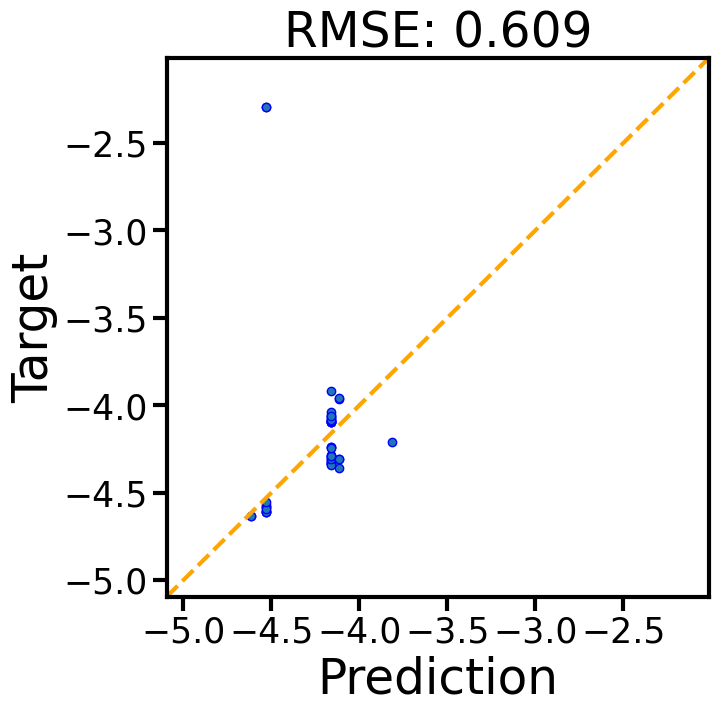

In [16]:
train_pte_matrix, test_pte_matrix = pte_simat.train_test_split(train_mids, test_mids)
reg_pte = SimilarityMatrixRegression(kernel_matrix=train_pte_matrix,  
                                 prediction_matrix=test_pte_matrix,  
                                 regressor=KernelRidge, 
                                 kernel = "precomputed",
                                 alpha = 1e-3).fitCV(train_targets,
                                                     n_folds=20,
                                                     regressor_parameters={'alpha': np.logspace(-1,-10, num = 10)},
                                                     square_kernel=True)
prediction_target_plot(reg_pte.predict() , test_targets)

fold:   0%|          | 0/20 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

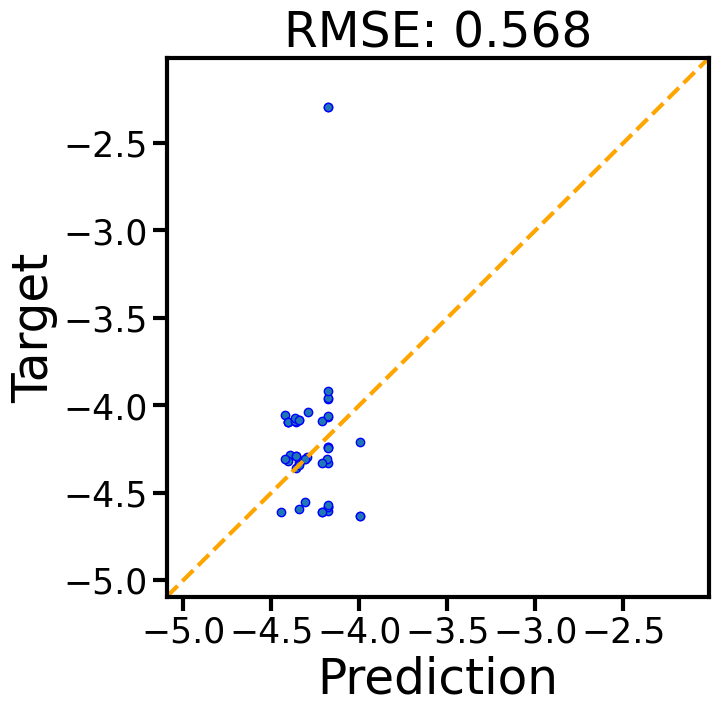

In [17]:
train_sg_matrix, test_sg_matrix = sg_simat.train_test_split(train_mids, test_mids)
reg_sg = SimilarityMatrixRegression(kernel_matrix=train_sg_matrix,  
                                 prediction_matrix=test_sg_matrix,  
                                 regressor=KernelRidge, 
                                 kernel = "precomputed",
                                 alpha = 1e-3).fitCV(train_targets,
                                                     n_folds=20,
                                                     regressor_parameters={'alpha': np.logspace(-1,-10, num = 10)},
                                                     square_kernel=True)
prediction_target_plot(reg_sg.predict() , test_targets)

Comparing these results to the fit with the SOAP similarity matrix, we can see that both the PTE and SG descriptor are inferior in terms of the predictive power. 

For the PTE similarity, many different materials have the same predicted value of the energy of mixing, which indicates that the descriptor is not sensitive enought. This is to be expected, since the PTE fingerprint does not account for the atomic structure.

Regarding the SG similarity, we already saw in the last tutorial that it does not correlate well with the energy per atom. Thus, the inferior performance can be anticipated.

As a last experiment, we are going to combine both the PTE and SG matrices to a new similarity matrix, where the similarity between two materials is defined as:
$$S_\mathrm{combined} = \frac{1}{2} \cdot S_\mathrm{PTE} + \frac{1}{2} \cdot S_\mathrm{SG}$$.

In [18]:
assert all(sg_simat.mids == pte_simat.mids), "Matrix ids are not aligned."
combined_matrix = pte_simat * 0.5 + sg_simat * 0.5

In [19]:
# Obtain the same train/test split
train_mat_combined, test_mat_combined = combined_matrix.train_test_split(train_mids, test_mids)

fold:   0%|          | 0/20 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

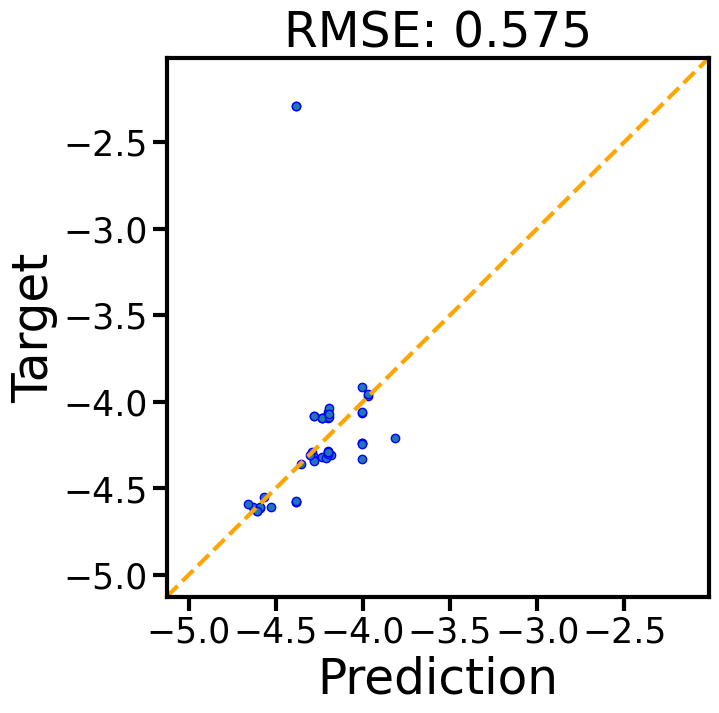

In [20]:
reg_combined = SimilarityMatrixRegression(kernel_matrix=train_mat_combined, 
                                          prediction_matrix=test_mat_combined, 
                                          regressor=KernelRidge, 
                                          kernel = "precomputed").fitCV(train_targets, n_folds=20, square_kernel=True, )
prediction_target_plot(reg_combined.predict() , test_targets)

As can be seen from the error, the predictive power can be improved, but does not achieve the same error as the SOAP similarity.

As a last example, we can obtain the CV errors of the optimization using:

In [21]:
cv_opt_soap = reg_combined.get_CV_optimization(train_targets, square_kernel=True, n_folds = 20)

fold:   0%|          | 0/20 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

params:   0%|          | 0/10 [00:00<?, ?it/s]

We can inspect the top performing parameters:

In [22]:
sorted(cv_opt_soap, key = lambda x: x["CV"]["mean"])[:5]

[{'params': {'alpha': 0.01},
  'CV': {'mean': 0.0758442875251312, 'max': 0.7300868047926059},
  'fitCV': {'mean': 0.05178193884664441, 'max': 0.05474215816572984}},
 {'params': {'alpha': 0.001},
  'CV': {'mean': 0.07593575547710298, 'max': 0.7307938513755003},
  'fitCV': {'mean': 0.051763376160793385, 'max': 0.0547267168590838}},
 {'params': {'alpha': 0.0001},
  'CV': {'mean': 0.07594691170006054, 'max': 0.7308654668490294},
  'fitCV': {'mean': 0.0517631768023417, 'max': 0.054726552548427475}},
 {'params': {'alpha': 1e-05},
  'CV': {'mean': 0.07594804898704842, 'max': 0.7308726379405935},
  'fitCV': {'mean': 0.05176317479410998, 'max': 0.054726550895823}},
 {'params': {'alpha': 1e-09},
  'CV': {'mean': 0.07594814883725018, 'max': 0.7308733151184871},
  'fitCV': {'mean': 0.0517631759435329, 'max': 0.05472654523191309}}]